# Importing Necessary Libraries

In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [429]:
#Loading dataset
df=pd.read_csv("mental_health_dataset.csv")
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Data cleaning and Handling missing values

In [430]:
#finding data types
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [431]:
#finding null values
df.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

Null Values are observed in state, work_interfere and comments.

In [432]:
#removing age anamoly

df = df[(df["Age"] >= 18) & (df["Age"] <= 65)]
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [433]:
#Dropping state, timestamp and comments, since they don't contibute in the research.

df=df.drop(["state","Timestamp", "comments"],axis=1)
df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [434]:
#Since,self employment cannot be given any random value, I am droppping self_employed column.
df=df.drop("self_employed",axis=1)

#filling null values of work_interfere as unknowns
df["work_interfere"]=df["work_interfere"].fillna("Unknown")
df.head(5)

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [435]:
#finding uinque values of gender
df["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [436]:
#categorising gender into Male, female and others to make dataset liable for reading and visualizing.

df["Gender"]= df["Gender"].replace({
    "M":"male", "Male":"male", "m":"male", "Male-ish":"male", "maile":"male", "something kinda male?":"male", "Cis Male":"male", "Mal":"male",
    "Male (CIS)":"male", "Make":"male", "male leaning androgynous":"male", "Male ":"male", "Man":"male", "msle":"male", "Mail":"male",
    "cis male":"male", "Malr":"male", "Cis Man":"male", "ostensibly male, unsure what that really means":"male", 'Guy (-ish) ^_^':"male",

    "Female":"female", "f":"female", "Cis Female":"female", "F":"female", "Femake":"female", "Female ":"female", "cis-female/femme":"female",
    "Woman":"female", "woman":"female", "Female (cis)":"female", "femail":"female", 

    "Trans-female":"others", "queer/she/they":"others", "non-binary":"others", "Nah":"others", "All":"others", "Trans woman":"others",
    "Enby":"others", "fluid":"others", "Genderqueer":"others", "Androgyne":"others", "Agender":"others", "Neuter":"others", 
    "queer":"others", "p":"others", "A little about you":"others", "Female (trans)":"others"
})
df.head()

,Age,Gender,Country,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,No,Yes,Often,6-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,No,No,Rarely,6-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [437]:
df.to_csv("clean_data.csv",index=False)

# Univariate analysis

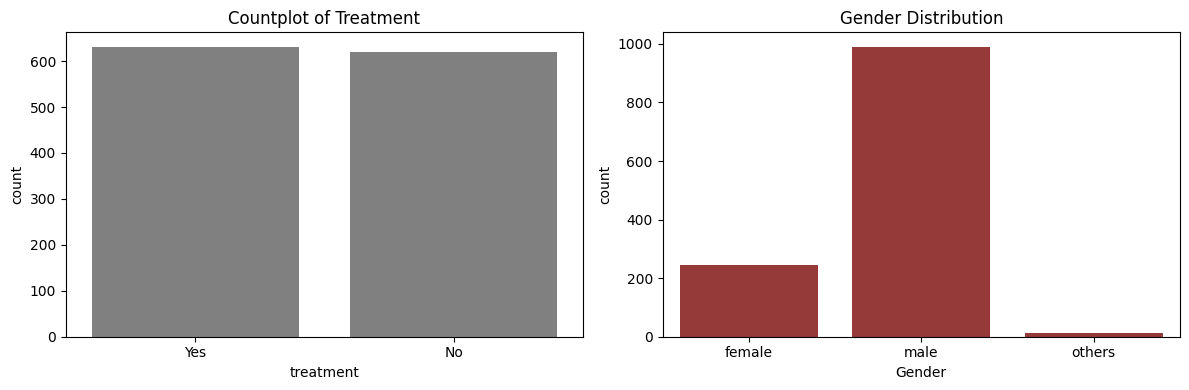

<function matplotlib.pyplot.show(close=None, block=None)>

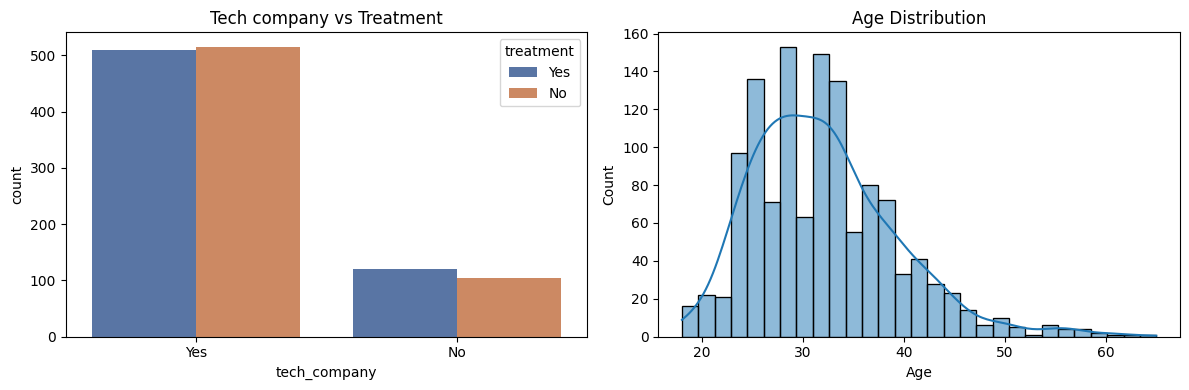

In [438]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
#countplot of treatment
sns.countplot(data=df,x="treatment", color="grey")
plt.title("Countplot of Treatment")
plt.subplot(1,2,2)
#gender distribution
sns.countplot(df,x="Gender",color="brown")
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()

#countplot of tech_company
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(df, x="tech_company",hue="treatment", palette="deep")
plt.title("Tech company vs Treatment")
plt.subplot(1,2,2)
sns.histplot(df,x="Age",kde=True)
plt.title("Age Distribution")
plt.tight_layout()
plt.show

## From above plots we can summarize that,
1. Count of people gaining treatment is high.
2. Count of males is higher in the dataset.
3. Count of people working in tech company is high.

# Bivariate Analysis

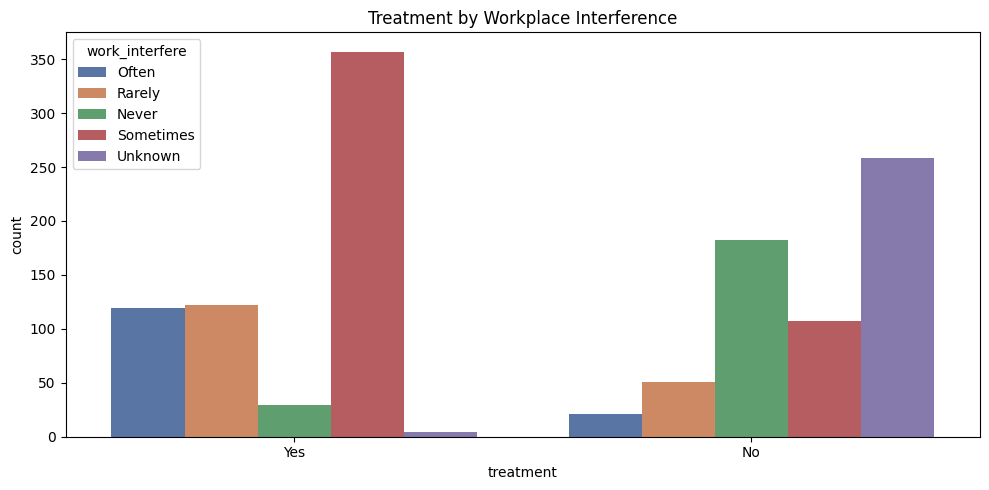

In [439]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='treatment', hue='work_interfere', palette="deep")
plt.title('Treatment by Workplace Interference')
plt.tight_layout()
plt.show()

## Interpretation from above graph:
People who are getting treatment, sometimes suffer from interference in the work.
 

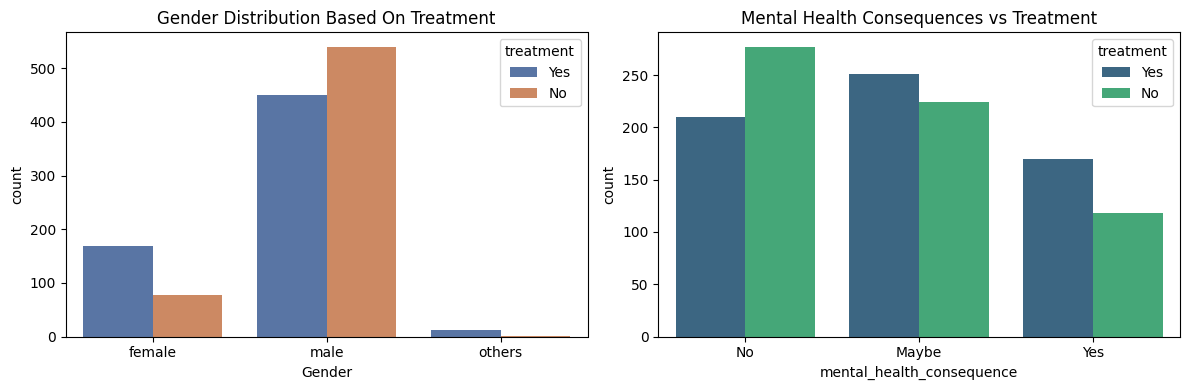

In [440]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
#Gender Distribution Based On Treatment
sns.countplot(df,x="Gender",hue="treatment", palette="deep")
plt.title("Gender Distribution Based On Treatment")
plt.tight_layout

plt.subplot(1,2,2)
#Mental Health Consequences vs Treatment
plt.title("Mental Health Consequences vs Treatment")
sns.countplot(df,x="mental_health_consequence",hue="treatment",palette="viridis")
plt.tight_layout()
plt.show()

## Interpretation from above plots:
1. Number of males without treatment are higher.\
   Number of females with treatment.
2. Higher number of people with no mental health coonsequences require no treatment.\
   Higher number of people with mental health consequences require treatment.

<function matplotlib.pyplot.show(close=None, block=None)>

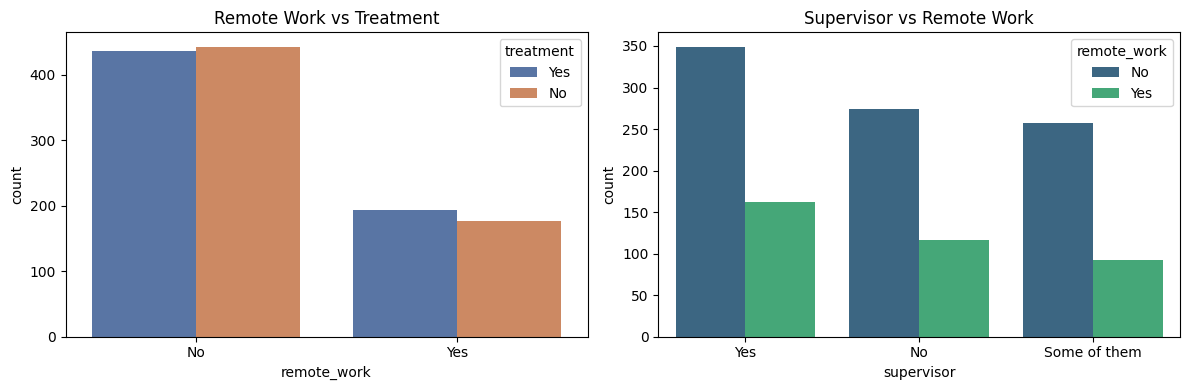

In [441]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(df, x="remote_work",hue="treatment", palette="deep")
plt.title("Remote Work vs Treatment")
plt.subplot(1,2,2)
sns.countplot(df,x="supervisor",hue="remote_work", palette="viridis")
plt.title("Supervisor vs Remote Work")
plt.tight_layout()
plt.show

## Interpretation  from Above Plots:
1. Remote work Vs treatment plot shows that people who don't do remote work, they are less likely to get treatment.\
   People who do remote work are more likely to get treatment.
2. Supervisor vs remote work plot shows that people who are not doing remote work beleive that they should talk to the supervisor about mental health. 

<function matplotlib.pyplot.show(close=None, block=None)>

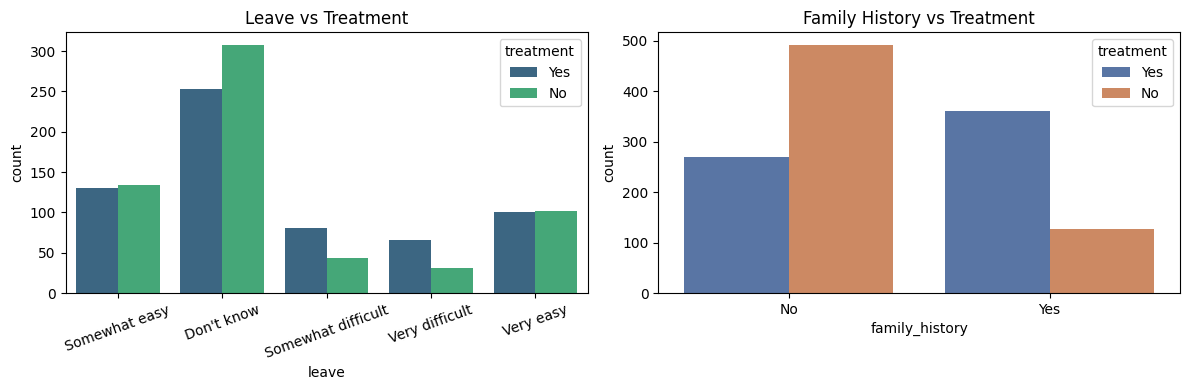

In [442]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(df,x="leave",hue="treatment", palette="viridis")
plt.title("Leave vs Treatment")
plt.xticks(rotation=20)
plt.tight_layout()
plt.subplot(1,2,2)
sns.countplot(df,x="family_history",hue="treatment", palette="deep")
plt.title("Family History vs Treatment")
plt.tight_layout()
plt.show